**Task 5**
Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.



Dataset :- https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

In [13]:
# Importing Libraries

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data vis
import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data Load

We loaded the Data into a data frame called df

In [18]:
# This cell was updated in Version II
#df=pd.read_csv('/kaggle/input/us-accidents/US_Accidents_Dec21_updated.csv', na_values='?')
df=pd.read_csv("C://Users/Sreeya/Desktop/internship/US_Accidents_March23.csv", na_values='?')

In [20]:
# lets look at the basic details of the dataframe
df.head()



,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


Now we lets look at a simple summary of the numeric varaibles

In [23]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


We are interested in the variables which we could use to indicate interstate highways. So there are too many columns to see in the above output. So let's look at all the variables by type.


In [26]:
df.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

# Pre-Processing of Data
The first task is to establish a reliable method to identify interstate highways. From the above variable names, the two likely candidates to assist us are "Description" and "Street". 

The explanation of these fields are
* Description: Shows a human-provided description of the accident.
* Street: Shows the street name in the address field.
    
Let us look at these two variables in more detail.

In [29]:
# First "Decription"
df.Description

0          Right lane blocked due to accident on I-70 Eas...
1          Accident on Brice Rd at Tussing Rd. Expect del...
2          Accident on OH-32 State Route 32 Westbound at ...
3          Accident on I-75 Southbound at Exits 52 52B US...
4          Accident on McEwen Rd at OH-725 Miamisburg Cen...
                                 ...                        
7728389                             At Market St - Accident.
7728390      At Camino Del Rio/Mission Center Rd - Accident.
7728391    At Glassell St/Grand Ave - Accident. in the ri...
7728392       At CA-90/Marina Fwy/Jefferson Blvd - Accident.
7728393                At Highland Ave/Arden Ave - Accident.
Name: Description, Length: 7728394, dtype: object

In [31]:
# now street
df.Street

0                             I-70 E
1                           Brice Rd
2                     State Route 32
3                             I-75 S
4          Miamisburg Centerville Rd
                     ...            
7728389                 Pomona Fwy E
7728390                        I-8 W
7728391             Garden Grove Fwy
7728392              San Diego Fwy S
7728393                     CA-210 W
Name: Street, Length: 7728394, dtype: object

Both Description and Street contain references to interstate highways.

# Concept Testing on a Subset of Dataset

We selected New York State to test if we could identify interstate highways. First, we created a sub-set data frame called df_NY.

In [37]:


df_nya = df.loc[df['State'] == "NY"]
df_nya


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
194250,A-194257,Source2,3,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
194251,A-194258,Source2,3,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,NaN,NaN,2.530,...,False,False,False,False,False,False,Day,Day,Day,Day
194252,A-194259,Source2,3,2016-11-30 15:26:18,2016-11-30 16:56:02,41.014034,-73.717239,NaN,NaN,1.170,...,False,False,False,False,False,False,Day,Day,Day,Day
194253,A-194260,Source2,3,2016-11-30 16:14:11,2016-11-30 16:59:00,41.390369,-73.597969,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
194254,A-194261,Source2,3,2016-11-30 16:17:57,2016-11-30 17:02:44,41.390369,-73.597969,NaN,NaN,0.010,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728007,A-7777375,Source1,2,2019-08-23 16:48:32,2019-08-23 17:16:06,40.731626,-73.872164,40.731626,-73.872164,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
7728011,A-7777379,Source1,2,2019-08-23 16:16:21,2019-08-23 16:44:16,40.969130,-73.816990,40.969130,-73.816990,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
7728012,A-7777380,Source1,2,2019-08-23 16:40:16,2019-08-23 17:06:13,40.689860,-73.567770,40.689910,-73.569200,0.075,...,False,False,False,False,False,False,Day,Day,Day,Day
7728019,A-7777387,Source1,2,2019-08-23 19:20:28,2019-08-23 19:49:25,40.601750,-74.060440,40.610690,-74.031740,1.627,...,False,False,False,False,False,False,Day,Day,Day,Day


According to the information available from the “List of Interstate Highways in New York“ (Wikipedia, 2021), There are 31 Interstate highways in the state of New York. The Interstate is commonly referred to by their national road number system, for example, I-90. The list of all New York Interstates are - I-78, I-81, I-84, I-86, I-87, I-88, I-90, I-90N, I-95, I-99, I-190, I-278, I-281, I-287, I-290, I-295, I-390, I-478, I-481, I-487, I-490, I-495, I-587, I-590, I-678, I-684, I-687, I-690, I-695, I-781, I-787, I-790, I-878, I-890, I-895 and I-990.

We then searched the “Description” variable for any strings stating one 
of the 31 Interstate numbers to determine if the accident had 
occurred on or near and Interstate highway and classified the road 
type as interstate or not.

To ensure that the 
road types identified as an interstate highway were truly classified, we plotted the road type 
classification against longitude and latitude of the accidents. Comparing our choleopath with the street 
map of the interstate highways in the State of New York, we observed a good alignment between the 
two, leading us to conclude that this process reasonably identified the location of Interstate highways.

In [45]:
# disable warings
import warnings
warnings.filterwarnings("ignore")

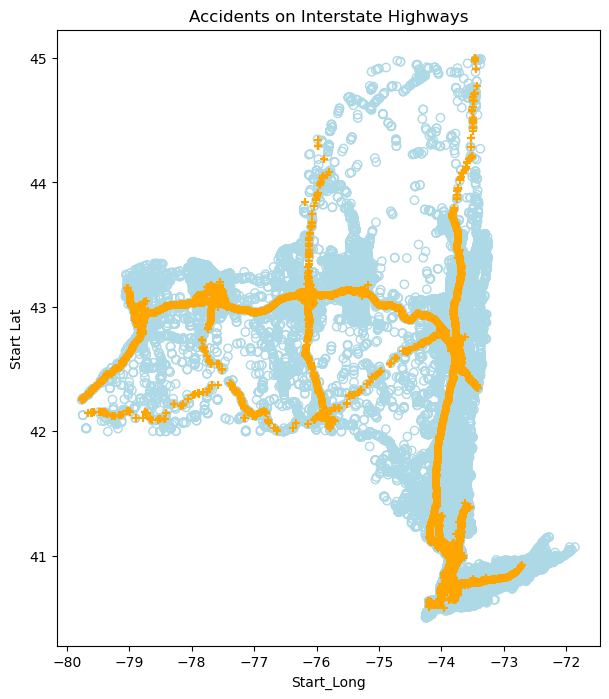

In [49]:

df_nya['interstateplus'] = df_nya["Description"].str.contains('INTERSTATE| interstate| I-78| I-81 |I-84, |I-86 |I-87 |I-88 |I-90 |I-90N |I-95 |I-99 |I-190 |I-278 |I-281 |I-287 |I-290 |I-295 |I-390 |I-478 |I-481 |I-487 |I-490 |I-495 |I-587 |I-590 |I-678 |I-684 |I-687|I-690 |I-695|I-781|I-787|I-790|I-878|I-890|I-895|I-990', na=False)
plotdata = [df_nya[~df_nya['interstateplus']][['Start_Lng','Start_Lat']], df_nya[df_nya['interstateplus']][['Start_Lng','Start_Lat']]]
markers = ["o","+"]
fcolors = ["none", "orange"]
ecolors = ["lightblue", "none"]
plotlabels = ['Interstate', "Not_interstate"]
plt.figure(figsize=(7, 8)) # Specify figure size
for data, label, marker, fcolor, ecolor in zip(plotdata, plotlabels, markers, fcolors, ecolors):
    plt.scatter(x=data['Start_Lng'],y=data['Start_Lat'],marker=marker,facecolors=fcolor, edgecolors=ecolor)
plt.xlabel('Start_Long') # Set the label for the x axis
plt.ylabel('Start Lat') # Set the label for the y axis
plt.title('Accidents on Interstate Highways') # Set the figure title
plt.show()

Based on the success of the data for NY State, we will expand this approach across all states. 

# Identifying Interstate Highways from Description

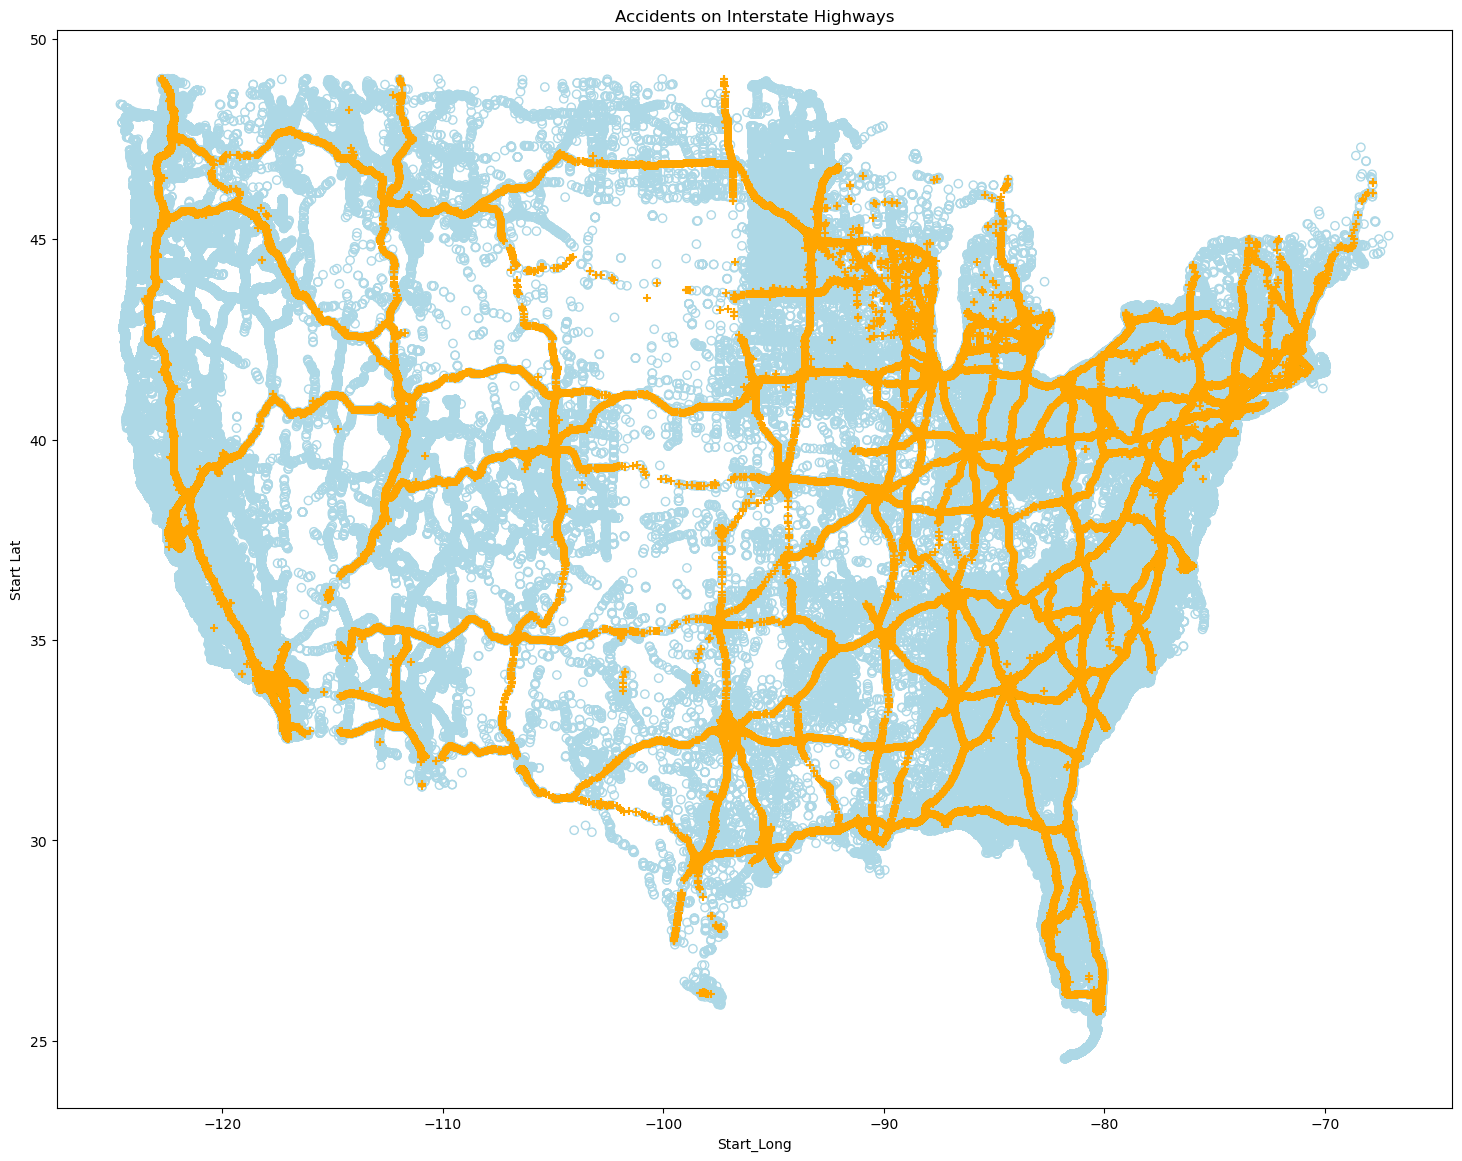

In [53]:
df['interstateplus'] = df["Description"].str.contains('INTERSTATE| interstate|I-2| I-4 |I-5 | I-8| I-10 |I-11| I-12| I-14 |I-15| I-16| I-17 |I-19| I-20| I-22 |I-24|I-25| I-26| I-27 |I-29| I-30| I-31 |I-35| I-37| I-39 |I-40 | I-41| I-42 |I-43| I-44| I-45 |I-49| I-55| I-57 |I-59 | I-64| I-65 |I-66| I-68| I-69 |I-70| I-71| I-72 |I-73| I-74| I-75 |I-75| I-76| I-77 | I-78| I-79 |I-80|I-81 |I-82 |I-83 |I-84 |I-85 |I-86 |I-87 |I-88 | I-89| I-90 | I-90N| I-91 |I-93 |I-94 |I-95| I-96| I-97 | I-99' , na=False) 
plotdata = [df[~df['interstateplus']][['Start_Lng','Start_Lat']], df[df['interstateplus']][['Start_Lng','Start_Lat']]]
markers = ["o","+"]
fcolors = ["none", "orange"]
ecolors = ["lightblue", "none"]
plotlabels = ['Interstate', "Not_interstate"]
plt.figure(figsize=(18, 14)) # Specify figure size
for data, label, marker, fcolor, ecolor in zip(plotdata, plotlabels, markers, fcolors, ecolors):
    plt.scatter(x=data['Start_Lng'],y=data['Start_Lat'],marker=marker,facecolors=fcolor, edgecolors=ecolor)
plt.xlabel('Start_Long') # Set the label for the x axis
plt.ylabel('Start Lat') # Set the label for the y axis
plt.title('Accidents on Interstate Highways') # Set the figure title
#plt.savefig("plotacconinter.png", format="png")
plt.show()

## Identifying Interstate Highways from Street Name

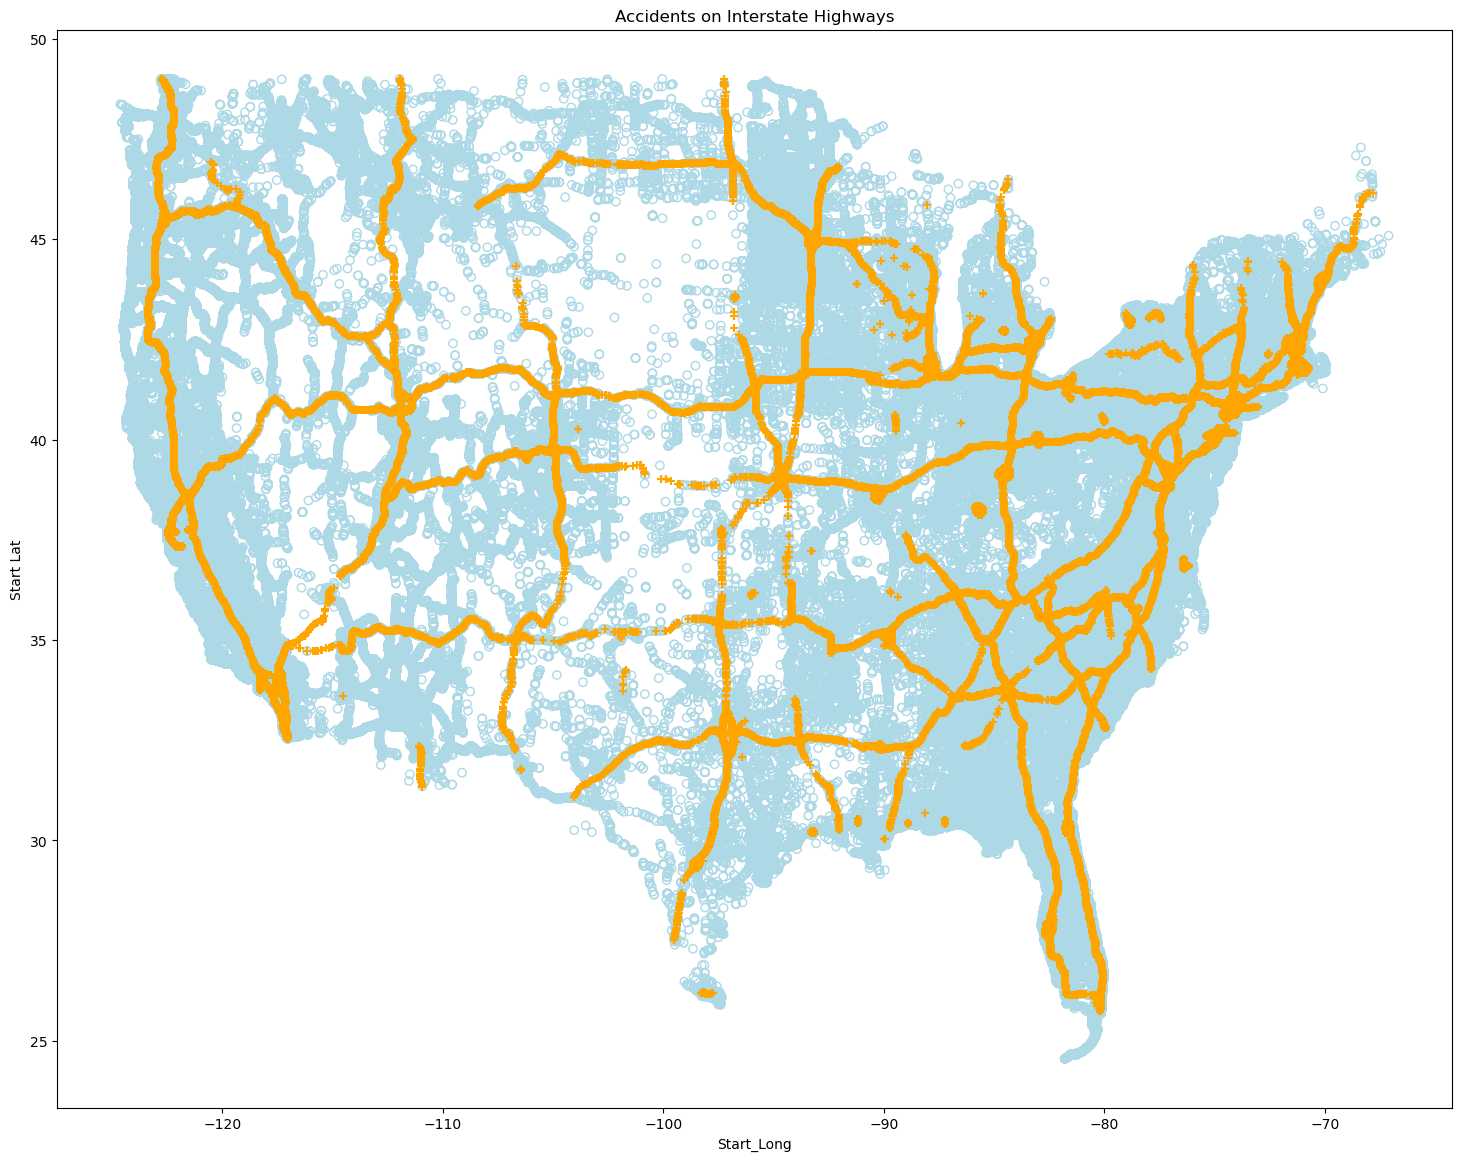

In [56]:
df['rtstreet'] = df["Street"].str.contains('INTERSTATE| interstate|I-2| I-4 |I-5 | I-8| I-10 |I-11| I-12| I-14 |I-15| I-16| I-17 |I-19| I-20| I-22 |I-24|I-25| I-26| I-27 |I-29| I-30| I-31 |I-35| I-37| I-39 |I-40 | I-41| I-42 |I-43| I-44| I-45 |I-49| I-55| I-57 |I-59 | I-64| I-65 |I-66| I-68| I-69 |I-70| I-71| I-72 |I-73| I-74| I-75 |I-75| I-76| I-77 | I-78| I-79 |I-80|I-81 |I-82 |I-83 |I-84 |I-85 |I-86 |I-87 |I-88 | I-89| I-90 | I-90N| I-91 |I-93 |I-94 |I-95| I-96| I-97 | I-99', na=False) 
plotdata = [df[~df['rtstreet']][['Start_Lng','Start_Lat']], df[df['rtstreet']][['Start_Lng','Start_Lat']]]
markers = ["o","+"]
fcolors = ["none", "orange"]
ecolors = ["lightblue", "none"]
plotlabels = ['Interstate', "Not_interstate"]
plt.figure(figsize=(18, 14)) # Specify figure size
for data, label, marker, fcolor, ecolor in zip(plotdata, plotlabels, markers, fcolors, ecolors):
    plt.scatter(x=data['Start_Lng'],y=data['Start_Lat'],marker=marker,facecolors=fcolor, edgecolors=ecolor)
plt.xlabel('Start_Long') # Set the label for the x axis
plt.ylabel('Start Lat') # Set the label for the y axis
plt.title('Accidents on Interstate Highways') # Set the figure title
plt.savefig("plotacconinter.png", format="png")
plt.show()

## Identifying Interstate Highways from Street Name and Description

In [59]:
# combine the interstate accidents identified from description and street
df["InstHwy"] = df[['interstateplus', 'rtstreet']].any(axis='columns')

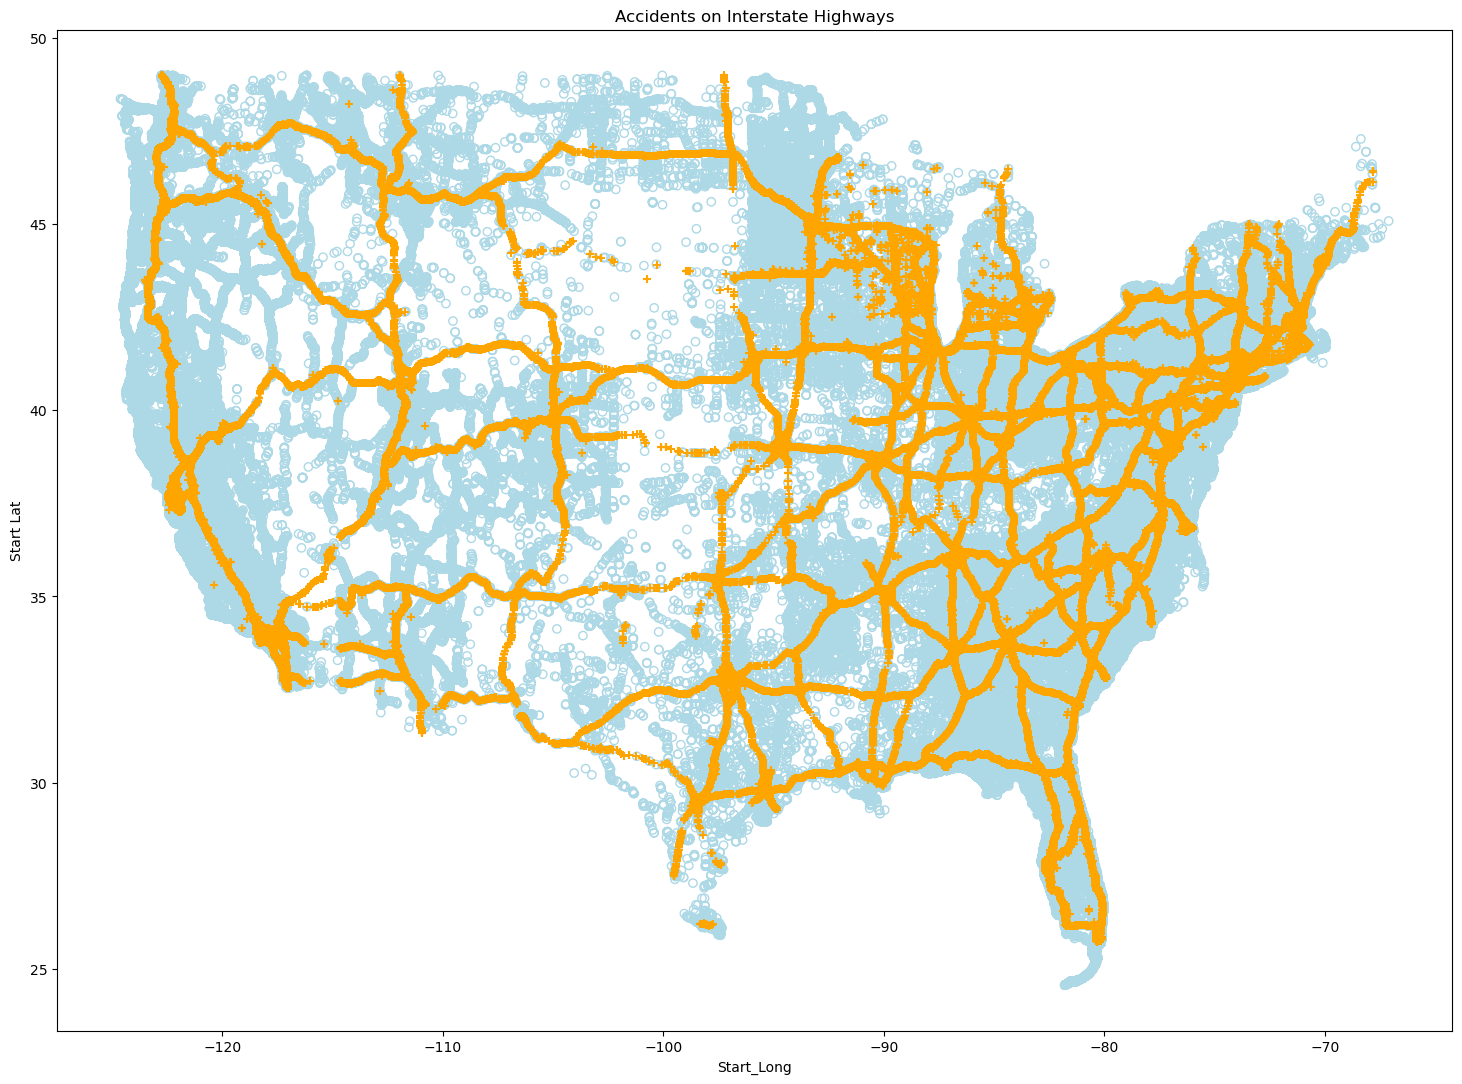

In [61]:
plotdata = [df[~df['InstHwy']][['Start_Lng','Start_Lat']], df[df['InstHwy']][['Start_Lng','Start_Lat']]]
markers = ["o","+"]
fcolors = ["none", "orange"]
ecolors = ["lightblue", "none"]
plotlabels = ['Interstate', "Not_interstate"]
plt.figure(figsize=(18, 13)) # Specify figure size
for data, label, marker, fcolor, ecolor in zip(plotdata, plotlabels, markers, fcolors, ecolors):
    plt.scatter(x=data['Start_Lng'],y=data['Start_Lat'],marker=marker,facecolors=fcolor, edgecolors=ecolor)
plt.xlabel('Start_Long') # Set the label for the x axis
plt.ylabel('Start Lat') # Set the label for the y axis
plt.title('Accidents on Interstate Highways') # Set the figure title
plt.show()

The reader may wonder, Why did we use both Description and Street variables? The code below shows that there are examples where either variable can identify an interstate highway. 

In [64]:
df[['Description', 'Street', 'interstateplus', 'rtstreet']].head(10)

,Description,Street,interstateplus,rtstreet
0,Right lane blocked due to accident on I-70 Eas...,I-70 E,True,True
1,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,False,False
2,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,False,False
3,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,True,True
4,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,False,False
5,Accident on I-270 Outerbelt Northbound near Ex...,Westerville Rd,True,False
6,Accident on Oakridge Dr at Woodward Ave. Expec...,N Woodward Ave,False,False
7,Accident on I-75 Southbound at Exit 54B Grand ...,N Main St,True,False
8,Accident on Notre Dame Ave at Warner Ave. Expe...,Notre Dame Ave,False,False
9,Right hand shoulder blocked due to accident on...,Westerville Rd,True,False


severity_counts = df["Severity"].value_counts()

plt.figure(figsize=(10, 8))
plt.title("Histogram for the severity")
sns.barplot(x=severity_counts.index, y=severity_counts.values)
plt.xlabel("Severity")
plt.ylabel("Value")
plt.show()

severity_perc=(severity_counts/(severity_counts.sum()))*100
severity_perc

## Create Variable called Road Type

In [68]:
df['Road_type'] = df["InstHwy"]
df.replace({"Road_type": {True:"Interstate", False:"Not_interstate"}}, inplace=True)
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,interstateplus,rtstreet,InstHwy,Road_type
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,Night,Night,Night,Night,True,True,True,Interstate
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,Night,Night,Night,Day,False,False,False,Not_interstate
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,True,False,Night,Night,Day,Day,False,False,False,Not_interstate
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,Night,Day,Day,Day,True,True,True,Interstate
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,True,False,Day,Day,Day,Day,False,False,False,Not_interstate


# Examination of Properties of Accidents on Interstates
In this section, we will examine if there is a difference between Interstatesate and Suburban Streets for the following properties:
* Severity
* Distance
* The proportion of Accidents that occur on Interstate Highways

First, we will look at Severity.

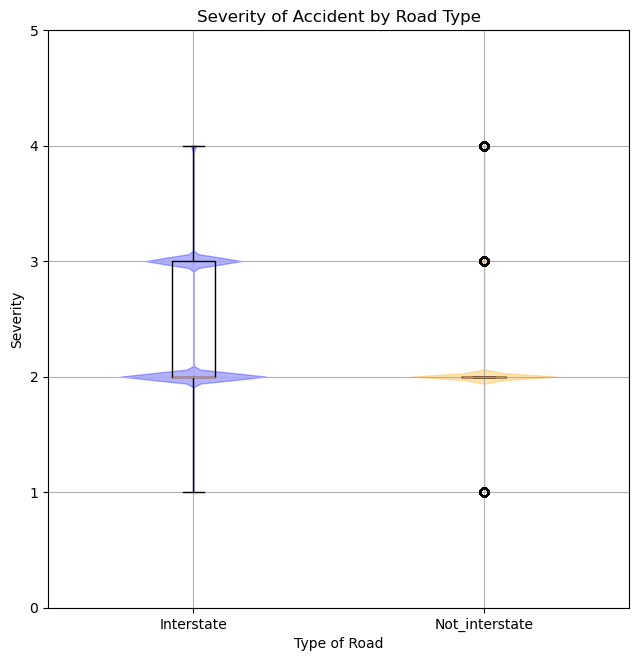

In [71]:
# Violin Plots (this is a check to see if anything interesting is here)
# and determine if there is a real difference

plotlabels = ['Interstate', "Not_interstate"]
plotdata = [df[df['Road_type']==label]['Severity'] for label in plotlabels]
colors = ['blue','orange']
plt.figure(figsize=(7.5, 7.5))
vparts = plt.violinplot(plotdata, showextrema=False) # Violin plot including density estimation
for patch, color in zip(vparts['bodies'], colors):
    patch.set_color(color) # Set color for violin plot
plt.boxplot(plotdata, widths=0.15, zorder=2, labels=plotlabels) # Overlay box plot
plt.xlabel('Type of Road') # Set x label
plt.ylabel('Severity') # Set y label
plt.ylim(0, 5) # Set limits for x axis
plt.title('Severity of Accident by Road Type') # Set title 
plt.grid(zorder=0) # Add grid
plt.savefig("voilplroadtype.png", format="png")
plt.show()

In [73]:
mean_inter_sev = np.mean(df[df["Road_type"]=="Interstate"]["Severity"])
mean_inter_sev

2.428715093918748

In [74]:
mean_notinter_sev = np.mean(df[df["Road_type"]=="Not_interstate"]["Severity"])
mean_notinter_sev

2.098074363543234

There is only a tiny difference in the Severity of an accident based on if it occurred on an interstate or not.
Now lets look at distance.

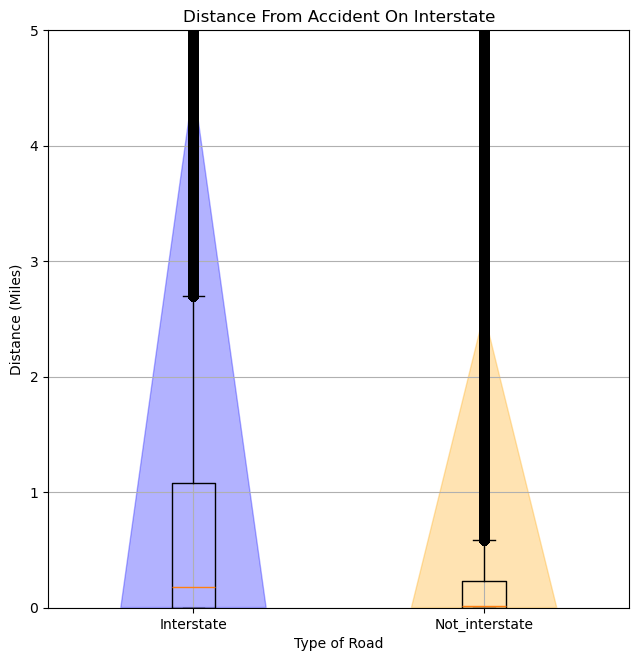

In [78]:
# Violin Plots

plotlabels = ['Interstate', "Not_interstate"]
plotdata = [df[df['Road_type']==label]['Distance(mi)'] for label in plotlabels]
colors = ['blue','orange']
plt.figure(figsize=(7.5, 7.5))
vparts = plt.violinplot(plotdata, showextrema=False) # Violin plot including density estimation
for patch, color in zip(vparts['bodies'], colors):
    patch.set_color(color) # Set color for violin plot
plt.boxplot(plotdata, widths=0.15, zorder=2, labels=plotlabels) # Overlay box plot
plt.xlabel('Type of Road') # Set x label
plt.ylabel('Distance (Miles)') # Set y label
plt.ylim(0, 5) # Set limits for x axis
plt.title('Distance From Accident On Interstate') # Set title 
plt.grid(zorder=0) # Add grid
plt.savefig("violindist.png", format="png")
plt.show()

From visual inspection, there does appear to be a difference. So let's compare the mean distances of the accidents on interstates to those not on interstates to see if there is a difference.

In [81]:
mean_inter_dist = np.mean(df[df["Road_type"]=="Interstate"]["Distance(mi)"])
mean_inter_dist

1.0091345496535686

In [83]:
mean_notinter_dist = np.mean(df[df["Road_type"]=="Not_interstate"]["Distance(mi)"])
mean_notinter_dist

0.32549091626330057

In [85]:
#First Perform a Levene's Test to Test for Variance Homogeneity for dist  by road type.
stat, p = stats.levene(df[df['Road_type']=='Interstate']['Distance(mi)'], df[df['Road_type']=='Not_interstate']['Distance(mi)'])
print("test statistic for Levene's Test W = {:.4f}; p-value = {:.4e}".format(stat, p))

test statistic for Levene's Test W = 268643.8092; p-value = 0.0000e+00


In [87]:
#Now run anova.
stat, p = stats.f_oneway(df[df['Road_type']=='Interstate']['Distance(mi)'], df[df['Road_type']=='Not_interstate']['Distance(mi)'])
print("test statistic F = {:.4f}; p-value = {:.4e}".format(stat, p))

test statistic F = 267761.6785; p-value = 0.0000e+00


We reviewed the average distance of an accident by road type. A violin plot of distance versus road type (above) confirmed that the mean distance of an accident on an interstate (1.248 miles) is longer than other road types (0.459 miles). After determining that the variance was not homogeneous (using a Levene’s test, p<0.001 ), we performed a Mann-Whitney test for distance by road type. The null hypothesis is that the median distance is the same. We found a significant difference between the median distance following an accident depending on the type of road on which the accident occurred (U = 1.62e5, p<0.001). 

## Proportion of accidents occurs on Interstate Highways

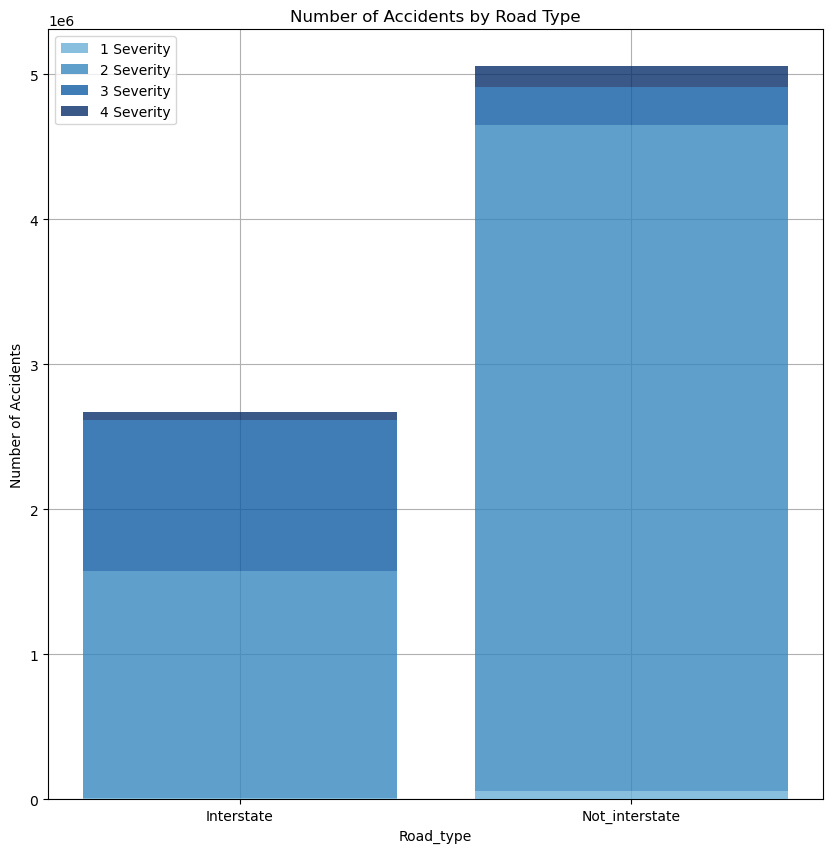

In [91]:
#so number of accidents by interstate or not
n_severity = df['ID'].groupby([df['Road_type'], df['Severity']]).count() # Count the number of accidents
n_severity = n_severity.unstack(level=-1).fillna(0) # Unstack into table format
plt.figure(figsize=(10, 10)) # Specify figure size
colors = plt.cm.Blues(np.linspace(0.5, 1, len(n_severity.columns))) # Get shades of blue as colors
y_offset = np.zeros(len(n_severity.index)) # Initialize offset used for stacking bars
for i, n in enumerate(n_severity.columns):
    plt.bar(n_severity.index, n_severity[n], bottom=y_offset, color=colors[i], label="{} Severity".format(n), alpha=0.8, zorder=3) # Bars for one number of cylinders
    y_offset += n_severity[n] # Increment offset
    plt.xticks(rotation=0)
plt.xlabel('Road_type') # Set the label for the x axis
plt.ylabel('Number of Accidents') # Set the label for the y axis
plt.title('Number of Accidents by Road Type') # Set the figure title
plt.legend() # Add legend
plt.grid(zorder=0) # Add gridplt.savefig("histsev.png", format="png")
plt.savefig("histnumaccrt.png", format="png")
plt.show()

In [93]:
#Number of Accidenst by Severity
AccNum=pd.crosstab(index=[df['Road_type']],margins=True, columns=df['Severity']).sort_values(by=[4],ascending = False)
AccNum.head(30)

Severity,1,2,3,4,All
Road_type,,,,,
All,67366,6156981,1299337,204710,7728394
Not_interstate,59790,4588215,261306,147199,5056510
Interstate,7576,1568766,1038031,57511,2671884


In [95]:
proportion = 2671884/7728394
proportion

0.3457230570801644

The proportion of accidents that occur on Interstate Highways is 31.1 %

##### Conclusion
Overall, we have found that we can identify interstate highways from the information provided in the dataset despite needing a specific label. We learnt that there is a significant difference in the distance of accidents depending on if they occur on an Interstate Highway or Suburban Streets. Finally, the proportion of accidents on an interstate highway is approximately 34.5% of all accidents, which is an increase from the earlier version where the proportion was 31% of all accidents.